In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import  train_test_split 
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import  mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelBinarizer, LabelEncoder


In [6]:
df = pd.read_pickle('life_tratado.pkl')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
df.Status.unique()

array(['Developing', 'Developed'], dtype=object)

In [8]:
enc = LabelEncoder()
df.Status = enc.fit_transform(df.Status) 

NameError: name 'LabelEncoder' is not defined

In [ ]:
df = df.iloc[:,2:]
df.head()


,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.Status = 1 - df.Status

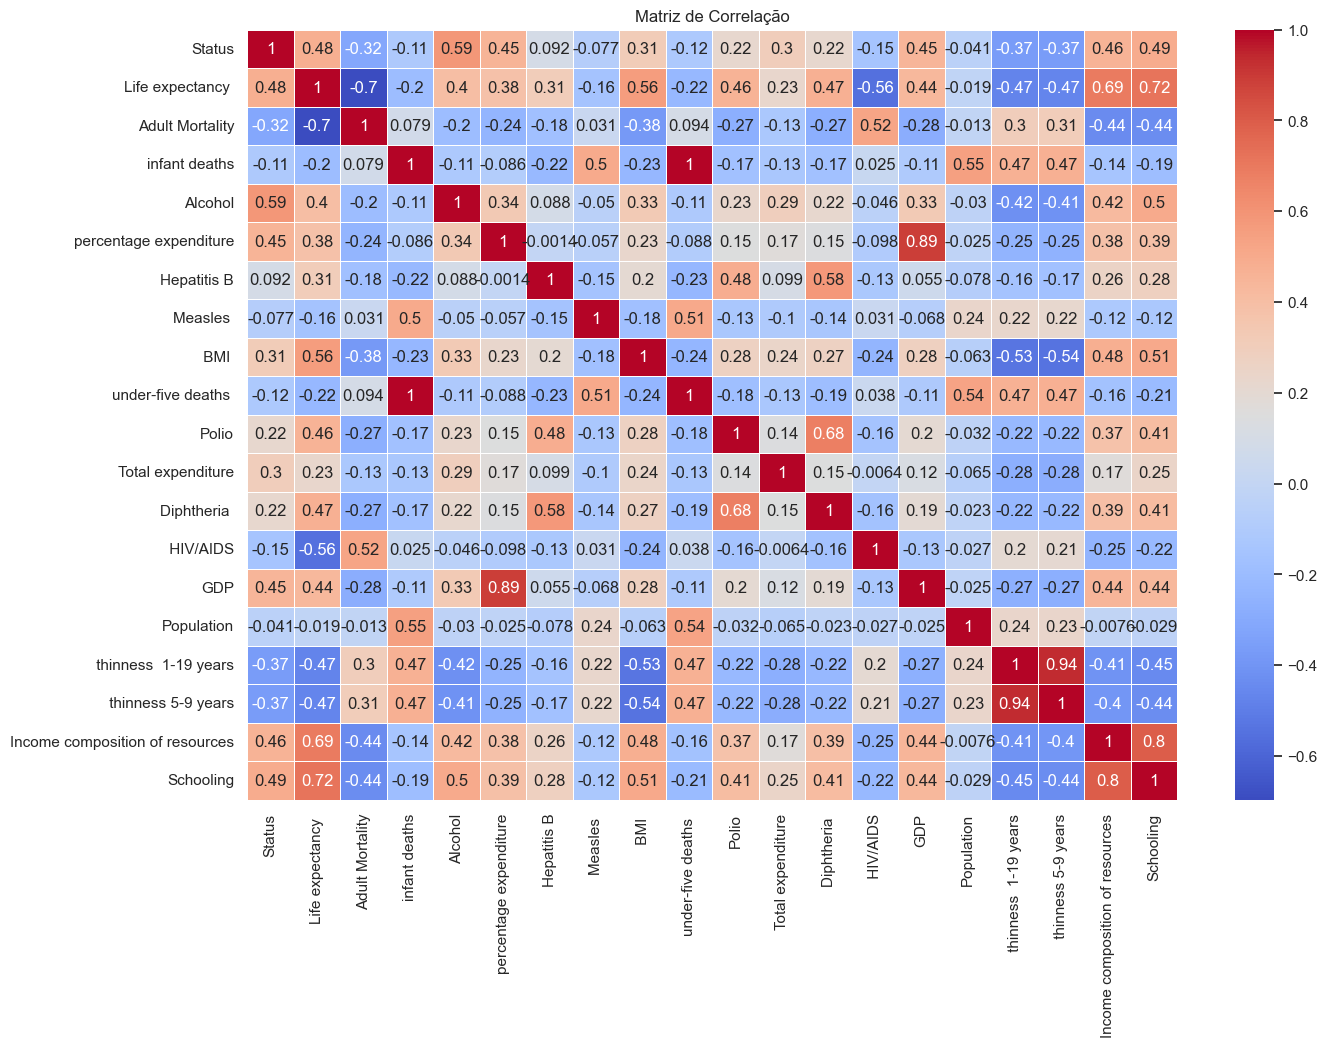

In [ ]:
correlation_matrix = df.corr()

# Criar um gráfico de matriz de correlação usando Seaborn
sns.set(style="white")  # Configurar o estilo do gráfico
plt.figure(figsize=(15, 10))  # Configurar o tamanho do gráfico

# Criar o mapa de calor (heatmap) da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Matriz de Correlação')
plt.show()

In [ ]:
y = df[df.columns[3]]
X = df.drop(df.columns[3],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 3.8645441553320032


In [ ]:
r2 = r2_score(y_test, predictions)
print(f'R² Score: {r2}')

R² Score: 0.9960807335660583


NameError: name 'y_pred' is not defined

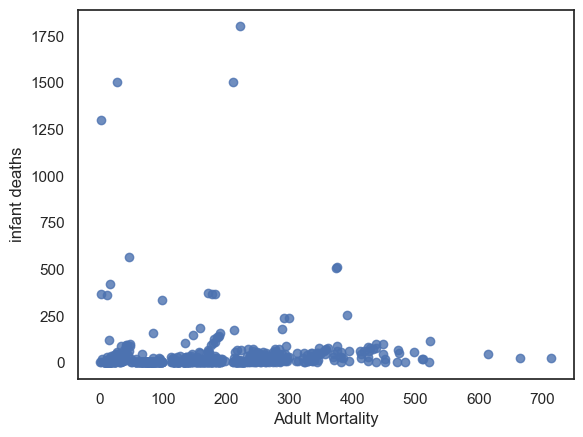

In [ ]:
sns.regplot(x=X_test['Adult Mortality'], y=y_test, fit_reg=False, label='Observações')  # fit_reg=False para não ajustar uma linha de regressão
sns.regplot(x=X_test['Adult Mortality'], y=predictions, scatter=False, label='Reta de Regressão', color='red')

# Adicionar rótulos e legenda
plt.xlabel('X Test')
plt.ylabel('Y')
plt.legend()

# Exibir o gráfico
plt.show()